# Observable trends:
    1. The data supports that temperatures closer to the equator are higher.
    2. There is no observable pattern in relation to wind speed and distance from the equator.
    3. There is also no observable pattern in relation to humidity and distance from the equator.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from OpenWeatherconfig import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [47]:
# Check API and preview data
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"appid" : api_key,"q" : cities[0], "units" : "imperial"}
response = requests.get(url, params=params).json()

print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -134.97,
        "lat": -23.12
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 70.25,
        "pressure": 1013,
        "humidity": 69,
        "temp_min": 70.25,
        "temp_max": 70.25,
        "sea_level": 1013,
        "grnd_level": 1012.87
    },
    "wind": {
        "speed": 21.27,
        "deg": 239.582
    },
    "rain": {
        "3h": 0.25
    },
    "clouds": {
        "all": 64
    },
    "dt": 1566704718,
    "sys": {
        "message": 0.0076,
        "country": "PF",
        "sunrise": 1566659876,
        "sunset": 1566701219
    },
    "timezone": -32400,
    "id": 4030556,
    "name": "Rikitea",
    "cod": 200
}


In [72]:
# Check target measures
lon_test= response["coord"]["lon"]
lat_test = response["coord"]["lat"]
temp_test = response["main"]["temp_max"]
humidity_test = response["main"]["humidity"]
clouds_test = response["clouds"]["all"]
wind_test = response["wind"]["speed"]
country_test = response["sys"]["country"]
date_test = response["dt"]

print(lon_test,lat_test,temp_test,humidity_test, clouds_test, wind_test,country_test,date_test)

-134.97 -23.12 70.25 69 64 21.27 PF 1566704718


In [111]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
lon = []
lat = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []
error_counter = 0
error_city = []
missed_records = 0
cityCNT = len(cities)
captured_cities = cityCNT-missed_records

print("Beginning Data Retrieval")

for place in cities:
    list_size = str(len(temp)+1)
    params["q"] = place
    c = params["q"]
    response2 = requests.get(url, params=params).json()
    time.sleep(1)
    error_counter = 0
    error_city = []
    try:
        print(f"Attempting record {list_size}, for city {c}.")
        lon2 = response2["coord"]["lon"]
        lat2 = response2["coord"]["lat"]
        temp2 = response2["main"]["temp_max"]
        hum2 = response2["main"]["humidity"]
        cld2 = response2["clouds"]["all"]
        spd2 = response2["wind"]["speed"]
        cntry2 = response2["sys"]["country"]
        date2 = response2["dt"]
                
    except:
        error_city.append(place)
        for attempt in range (0,4):
            error_counter = error_counter + 1
            params["q"] = error_city[0]
            c2 = params["q"]
            if error_counter <= 3:
                time.sleep(3)
                params["q"] = error_city[0]
                print(f"  Update attempt failed, attempt number {str(error_counter)}.")
                try:
                    lon3 = response2["coord"]["lon"]
                    lat3 = response2["coord"]["lat"]
                    temp3 = response2["main"]["temp_max"]
                    hum3 = response2["main"]["humidity"]
                    cld3 = response2["clouds"]["all"]
                    spd3 = response2["wind"]["speed"]
                    cntry3 = response2["sys"]["country"]
                    date3 = response2["dt"]
                except:
                    continue
                else:
                    print(f" Updating {c2}, record {list_size} item 1.")
                    temp.append(temp3)
                    print(f" Updating {c2}, record {list_size} item 2.")      
                    humidity.append(hum3)
                    print(f" Updating {c2}, record {list_size} item 3.")
                    clouds.append(cld3)
                    print(f" Updating {c2}, record {list_size} item 4.")
                    wind.append(spd3) 
                    print(f" Updating {c2}, record {list_size} item 5.")
                    country.append(cntry3)
                    print(f" Updating {c2}, record {list_size} item 6.")
                    date.append(date3)
                    print(f" Updating {c2}, record {list_size} item 7.")
                    lon.append(lon3)
                    print(f" Updating {c2}, record {list_size} item 8.")
                    lat.append(lat3)
                    error_counter = 10
            elif error_counter < 9:
                print(f"     Max attempts reached. {c2}, record {list_size} item 1 - 8 is NaN.")
                temp.append("NaN")
                humidity.append("NaN")
                clouds.append("NaN")
                wind.append("NaN")
                country.append("NaN")
                date.append("NaN")
                lon.append("NaN")
                lat.append("NaN")
                error_counter = 10
                missed_records = missed_records + 1
    else:
        print(f" Updating {c}, record {list_size} item 1.")
        temp.append(temp2)
        print(f" Updating {c}, record {list_size} item 2.")      
        humidity.append(hum2)
        print(f" Updating {c}, record {list_size} item 3.")
        clouds.append(cld2)
        print(f" Updating {c}, record {list_size} item 4.")
        wind.append(spd2)
        print(f" Updating {c}, record {list_size} item 5.")
        country.append(cntry2)
        print(f" Updating {c}, record {list_size} item 6.")
        date.append(date2)
        print(f" Updating {c}, record {list_size} item 7.")
        lon.append(lon2)
        print(f" Updating {c}, record {list_size} item 8.")
        lat.append(lat2)
                    
print("Data Retrieval Complete")
if len(temp) == len(humidity) and len(temp) == len(clouds) and len(temp) == len(wind) and len(temp) == len(cities):
    print("Data Check: PASS")
    print(f"Non-Responsive cities: {str(missed_records)}")
    print(f"Total captured cities: {str(captured_cities)}")
else:
    print("Data Check: FAIL")
    print("Fail Reason: Missing Data Elements")

Beginning Data Retrieval
Attempting record 1, for city rikitea.
 Updating rikitea, record 1 item 1.
 Updating rikitea, record 1 item 2.
 Updating rikitea, record 1 item 3.
 Updating rikitea, record 1 item 4.
 Updating rikitea, record 1 item 5.
 Updating rikitea, record 1 item 6.
 Updating rikitea, record 1 item 7.
 Updating rikitea, record 1 item 8.
Attempting record 2, for city ushuaia.
 Updating ushuaia, record 2 item 1.
 Updating ushuaia, record 2 item 2.
 Updating ushuaia, record 2 item 3.
 Updating ushuaia, record 2 item 4.
 Updating ushuaia, record 2 item 5.
 Updating ushuaia, record 2 item 6.
 Updating ushuaia, record 2 item 7.
 Updating ushuaia, record 2 item 8.
Attempting record 3, for city diapaga.
 Updating diapaga, record 3 item 1.
 Updating diapaga, record 3 item 2.
 Updating diapaga, record 3 item 3.
 Updating diapaga, record 3 item 4.
 Updating diapaga, record 3 item 5.
 Updating diapaga, record 3 item 6.
 Updating diapaga, record 3 item 7.
 Updating diapaga, record 3 it

Attempting record 25, for city upernavik.
 Updating upernavik, record 25 item 1.
 Updating upernavik, record 25 item 2.
 Updating upernavik, record 25 item 3.
 Updating upernavik, record 25 item 4.
 Updating upernavik, record 25 item 5.
 Updating upernavik, record 25 item 6.
 Updating upernavik, record 25 item 7.
 Updating upernavik, record 25 item 8.
Attempting record 26, for city bluff.
 Updating bluff, record 26 item 1.
 Updating bluff, record 26 item 2.
 Updating bluff, record 26 item 3.
 Updating bluff, record 26 item 4.
 Updating bluff, record 26 item 5.
 Updating bluff, record 26 item 6.
 Updating bluff, record 26 item 7.
 Updating bluff, record 26 item 8.
Attempting record 27, for city mount gambier.
 Updating mount gambier, record 27 item 1.
 Updating mount gambier, record 27 item 2.
 Updating mount gambier, record 27 item 3.
 Updating mount gambier, record 27 item 4.
 Updating mount gambier, record 27 item 5.
 Updating mount gambier, record 27 item 6.
 Updating mount gambier,

Attempting record 49, for city nikolskoye.
 Updating nikolskoye, record 49 item 1.
 Updating nikolskoye, record 49 item 2.
 Updating nikolskoye, record 49 item 3.
 Updating nikolskoye, record 49 item 4.
 Updating nikolskoye, record 49 item 5.
 Updating nikolskoye, record 49 item 6.
 Updating nikolskoye, record 49 item 7.
 Updating nikolskoye, record 49 item 8.
Attempting record 50, for city ostrovnoy.
 Updating ostrovnoy, record 50 item 1.
 Updating ostrovnoy, record 50 item 2.
 Updating ostrovnoy, record 50 item 3.
 Updating ostrovnoy, record 50 item 4.
 Updating ostrovnoy, record 50 item 5.
 Updating ostrovnoy, record 50 item 6.
 Updating ostrovnoy, record 50 item 7.
 Updating ostrovnoy, record 50 item 8.
Attempting record 51, for city isangel.
 Updating isangel, record 51 item 1.
 Updating isangel, record 51 item 2.
 Updating isangel, record 51 item 3.
 Updating isangel, record 51 item 4.
 Updating isangel, record 51 item 5.
 Updating isangel, record 51 item 6.
 Updating isangel, re

Attempting record 74, for city sakakah.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. sakakah, record 74 item 1 - 8 is NaN.
Attempting record 75, for city lebu.
 Updating lebu, record 75 item 1.
 Updating lebu, record 75 item 2.
 Updating lebu, record 75 item 3.
 Updating lebu, record 75 item 4.
 Updating lebu, record 75 item 5.
 Updating lebu, record 75 item 6.
 Updating lebu, record 75 item 7.
 Updating lebu, record 75 item 8.
Attempting record 76, for city chuy.
 Updating chuy, record 76 item 1.
 Updating chuy, record 76 item 2.
 Updating chuy, record 76 item 3.
 Updating chuy, record 76 item 4.
 Updating chuy, record 76 item 5.
 Updating chuy, record 76 item 6.
 Updating chuy, record 76 item 7.
 Updating chuy, record 76 item 8.
Attempting record 77, for city cascais.
 Updating cascais, record 77 item 1.
 Updating cascais, record 77 item 2.
 Updating cascais, record 77 item 

Attempting record 99, for city deep river.
 Updating deep river, record 99 item 1.
 Updating deep river, record 99 item 2.
 Updating deep river, record 99 item 3.
 Updating deep river, record 99 item 4.
 Updating deep river, record 99 item 5.
 Updating deep river, record 99 item 6.
 Updating deep river, record 99 item 7.
 Updating deep river, record 99 item 8.
Attempting record 100, for city sao joao da barra.
 Updating sao joao da barra, record 100 item 1.
 Updating sao joao da barra, record 100 item 2.
 Updating sao joao da barra, record 100 item 3.
 Updating sao joao da barra, record 100 item 4.
 Updating sao joao da barra, record 100 item 5.
 Updating sao joao da barra, record 100 item 6.
 Updating sao joao da barra, record 100 item 7.
 Updating sao joao da barra, record 100 item 8.
Attempting record 101, for city butaritari.
 Updating butaritari, record 101 item 1.
 Updating butaritari, record 101 item 2.
 Updating butaritari, record 101 item 3.
 Updating butaritari, record 101 it

Attempting record 122, for city mpongwe.
 Updating mpongwe, record 122 item 1.
 Updating mpongwe, record 122 item 2.
 Updating mpongwe, record 122 item 3.
 Updating mpongwe, record 122 item 4.
 Updating mpongwe, record 122 item 5.
 Updating mpongwe, record 122 item 6.
 Updating mpongwe, record 122 item 7.
 Updating mpongwe, record 122 item 8.
Attempting record 123, for city hermanus.
 Updating hermanus, record 123 item 1.
 Updating hermanus, record 123 item 2.
 Updating hermanus, record 123 item 3.
 Updating hermanus, record 123 item 4.
 Updating hermanus, record 123 item 5.
 Updating hermanus, record 123 item 6.
 Updating hermanus, record 123 item 7.
 Updating hermanus, record 123 item 8.
Attempting record 124, for city hyeres.
 Updating hyeres, record 124 item 1.
 Updating hyeres, record 124 item 2.
 Updating hyeres, record 124 item 3.
 Updating hyeres, record 124 item 4.
 Updating hyeres, record 124 item 5.
 Updating hyeres, record 124 item 6.
 Updating hyeres, record 124 item 7.
 U

Attempting record 146, for city kegayli.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. kegayli, record 146 item 1 - 8 is NaN.
Attempting record 147, for city cherskiy.
 Updating cherskiy, record 147 item 1.
 Updating cherskiy, record 147 item 2.
 Updating cherskiy, record 147 item 3.
 Updating cherskiy, record 147 item 4.
 Updating cherskiy, record 147 item 5.
 Updating cherskiy, record 147 item 6.
 Updating cherskiy, record 147 item 7.
 Updating cherskiy, record 147 item 8.
Attempting record 148, for city takoradi.
 Updating takoradi, record 148 item 1.
 Updating takoradi, record 148 item 2.
 Updating takoradi, record 148 item 3.
 Updating takoradi, record 148 item 4.
 Updating takoradi, record 148 item 5.
 Updating takoradi, record 148 item 6.
 Updating takoradi, record 148 item 7.
 Updating takoradi, record 148 item 8.
Attempting record 149, for city sao filipe.
 Updating sa

  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. vaitupu, record 170 item 1 - 8 is NaN.
Attempting record 171, for city luderitz.
 Updating luderitz, record 171 item 1.
 Updating luderitz, record 171 item 2.
 Updating luderitz, record 171 item 3.
 Updating luderitz, record 171 item 4.
 Updating luderitz, record 171 item 5.
 Updating luderitz, record 171 item 6.
 Updating luderitz, record 171 item 7.
 Updating luderitz, record 171 item 8.
Attempting record 172, for city georgetown.
 Updating georgetown, record 172 item 1.
 Updating georgetown, record 172 item 2.
 Updating georgetown, record 172 item 3.
 Updating georgetown, record 172 item 4.
 Updating georgetown, record 172 item 5.
 Updating georgetown, record 172 item 6.
 Updating georgetown, record 172 item 7.
 Updating georgetown, record 172 item 8.
Attempting record 173, for city miandoab.
 Updating miandoab, record 173 item 1.
 Updating miandoab, record 173 item 2.
 U

Attempting record 194, for city benguela.
 Updating benguela, record 194 item 1.
 Updating benguela, record 194 item 2.
 Updating benguela, record 194 item 3.
 Updating benguela, record 194 item 4.
 Updating benguela, record 194 item 5.
 Updating benguela, record 194 item 6.
 Updating benguela, record 194 item 7.
 Updating benguela, record 194 item 8.
Attempting record 195, for city vila franca do campo.
 Updating vila franca do campo, record 195 item 1.
 Updating vila franca do campo, record 195 item 2.
 Updating vila franca do campo, record 195 item 3.
 Updating vila franca do campo, record 195 item 4.
 Updating vila franca do campo, record 195 item 5.
 Updating vila franca do campo, record 195 item 6.
 Updating vila franca do campo, record 195 item 7.
 Updating vila franca do campo, record 195 item 8.
Attempting record 196, for city dauriya.
 Updating dauriya, record 196 item 1.
 Updating dauriya, record 196 item 2.
 Updating dauriya, record 196 item 3.
 Updating dauriya, record 196

Attempting record 218, for city mahibadhoo.
 Updating mahibadhoo, record 218 item 1.
 Updating mahibadhoo, record 218 item 2.
 Updating mahibadhoo, record 218 item 3.
 Updating mahibadhoo, record 218 item 4.
 Updating mahibadhoo, record 218 item 5.
 Updating mahibadhoo, record 218 item 6.
 Updating mahibadhoo, record 218 item 7.
 Updating mahibadhoo, record 218 item 8.
Attempting record 219, for city artesia.
 Updating artesia, record 219 item 1.
 Updating artesia, record 219 item 2.
 Updating artesia, record 219 item 3.
 Updating artesia, record 219 item 4.
 Updating artesia, record 219 item 5.
 Updating artesia, record 219 item 6.
 Updating artesia, record 219 item 7.
 Updating artesia, record 219 item 8.
Attempting record 220, for city hualmay.
 Updating hualmay, record 220 item 1.
 Updating hualmay, record 220 item 2.
 Updating hualmay, record 220 item 3.
 Updating hualmay, record 220 item 4.
 Updating hualmay, record 220 item 5.
 Updating hualmay, record 220 item 6.
 Updating hual

Attempting record 242, for city sirnak.
 Updating sirnak, record 242 item 1.
 Updating sirnak, record 242 item 2.
 Updating sirnak, record 242 item 3.
 Updating sirnak, record 242 item 4.
 Updating sirnak, record 242 item 5.
 Updating sirnak, record 242 item 6.
 Updating sirnak, record 242 item 7.
 Updating sirnak, record 242 item 8.
Attempting record 243, for city umzimvubu.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. umzimvubu, record 243 item 1 - 8 is NaN.
Attempting record 244, for city wukari.
 Updating wukari, record 244 item 1.
 Updating wukari, record 244 item 2.
 Updating wukari, record 244 item 3.
 Updating wukari, record 244 item 4.
 Updating wukari, record 244 item 5.
 Updating wukari, record 244 item 6.
 Updating wukari, record 244 item 7.
 Updating wukari, record 244 item 8.
Attempting record 245, for city north platte.
 Updating north platte, record 245 item 1.

Attempting record 267, for city awjilah.
 Updating awjilah, record 267 item 1.
 Updating awjilah, record 267 item 2.
 Updating awjilah, record 267 item 3.
 Updating awjilah, record 267 item 4.
 Updating awjilah, record 267 item 5.
 Updating awjilah, record 267 item 6.
 Updating awjilah, record 267 item 7.
 Updating awjilah, record 267 item 8.
Attempting record 268, for city tigil.
 Updating tigil, record 268 item 1.
 Updating tigil, record 268 item 2.
 Updating tigil, record 268 item 3.
 Updating tigil, record 268 item 4.
 Updating tigil, record 268 item 5.
 Updating tigil, record 268 item 6.
 Updating tigil, record 268 item 7.
 Updating tigil, record 268 item 8.
Attempting record 269, for city mersing.
 Updating mersing, record 269 item 1.
 Updating mersing, record 269 item 2.
 Updating mersing, record 269 item 3.
 Updating mersing, record 269 item 4.
 Updating mersing, record 269 item 5.
 Updating mersing, record 269 item 6.
 Updating mersing, record 269 item 7.
 Updating mersing, re

Attempting record 290, for city bilma.
 Updating bilma, record 290 item 1.
 Updating bilma, record 290 item 2.
 Updating bilma, record 290 item 3.
 Updating bilma, record 290 item 4.
 Updating bilma, record 290 item 5.
 Updating bilma, record 290 item 6.
 Updating bilma, record 290 item 7.
 Updating bilma, record 290 item 8.
Attempting record 291, for city boa vista.
 Updating boa vista, record 291 item 1.
 Updating boa vista, record 291 item 2.
 Updating boa vista, record 291 item 3.
 Updating boa vista, record 291 item 4.
 Updating boa vista, record 291 item 5.
 Updating boa vista, record 291 item 6.
 Updating boa vista, record 291 item 7.
 Updating boa vista, record 291 item 8.
Attempting record 292, for city rochester.
 Updating rochester, record 292 item 1.
 Updating rochester, record 292 item 2.
 Updating rochester, record 292 item 3.
 Updating rochester, record 292 item 4.
 Updating rochester, record 292 item 5.
 Updating rochester, record 292 item 6.
 Updating rochester, record

Attempting record 315, for city prince rupert.
 Updating prince rupert, record 315 item 1.
 Updating prince rupert, record 315 item 2.
 Updating prince rupert, record 315 item 3.
 Updating prince rupert, record 315 item 4.
 Updating prince rupert, record 315 item 5.
 Updating prince rupert, record 315 item 6.
 Updating prince rupert, record 315 item 7.
 Updating prince rupert, record 315 item 8.
Attempting record 316, for city coos bay.
 Updating coos bay, record 316 item 1.
 Updating coos bay, record 316 item 2.
 Updating coos bay, record 316 item 3.
 Updating coos bay, record 316 item 4.
 Updating coos bay, record 316 item 5.
 Updating coos bay, record 316 item 6.
 Updating coos bay, record 316 item 7.
 Updating coos bay, record 316 item 8.
Attempting record 317, for city coahuayana.
 Updating coahuayana, record 317 item 1.
 Updating coahuayana, record 317 item 2.
 Updating coahuayana, record 317 item 3.
 Updating coahuayana, record 317 item 4.
 Updating coahuayana, record 317 item 5

Attempting record 339, for city yar-sale.
 Updating yar-sale, record 339 item 1.
 Updating yar-sale, record 339 item 2.
 Updating yar-sale, record 339 item 3.
 Updating yar-sale, record 339 item 4.
 Updating yar-sale, record 339 item 5.
 Updating yar-sale, record 339 item 6.
 Updating yar-sale, record 339 item 7.
 Updating yar-sale, record 339 item 8.
Attempting record 340, for city vestmannaeyjar.
 Updating vestmannaeyjar, record 340 item 1.
 Updating vestmannaeyjar, record 340 item 2.
 Updating vestmannaeyjar, record 340 item 3.
 Updating vestmannaeyjar, record 340 item 4.
 Updating vestmannaeyjar, record 340 item 5.
 Updating vestmannaeyjar, record 340 item 6.
 Updating vestmannaeyjar, record 340 item 7.
 Updating vestmannaeyjar, record 340 item 8.
Attempting record 341, for city nara.
 Updating nara, record 341 item 1.
 Updating nara, record 341 item 2.
 Updating nara, record 341 item 3.
 Updating nara, record 341 item 4.
 Updating nara, record 341 item 5.
 Updating nara, record 34

Attempting record 363, for city port hawkesbury.
 Updating port hawkesbury, record 363 item 1.
 Updating port hawkesbury, record 363 item 2.
 Updating port hawkesbury, record 363 item 3.
 Updating port hawkesbury, record 363 item 4.
 Updating port hawkesbury, record 363 item 5.
 Updating port hawkesbury, record 363 item 6.
 Updating port hawkesbury, record 363 item 7.
 Updating port hawkesbury, record 363 item 8.
Attempting record 364, for city kirovskiy.
 Updating kirovskiy, record 364 item 1.
 Updating kirovskiy, record 364 item 2.
 Updating kirovskiy, record 364 item 3.
 Updating kirovskiy, record 364 item 4.
 Updating kirovskiy, record 364 item 5.
 Updating kirovskiy, record 364 item 6.
 Updating kirovskiy, record 364 item 7.
 Updating kirovskiy, record 364 item 8.
Attempting record 365, for city chernyshevskiy.
 Updating chernyshevskiy, record 365 item 1.
 Updating chernyshevskiy, record 365 item 2.
 Updating chernyshevskiy, record 365 item 3.
 Updating chernyshevskiy, record 365 

Attempting record 387, for city neiafu.
 Updating neiafu, record 387 item 1.
 Updating neiafu, record 387 item 2.
 Updating neiafu, record 387 item 3.
 Updating neiafu, record 387 item 4.
 Updating neiafu, record 387 item 5.
 Updating neiafu, record 387 item 6.
 Updating neiafu, record 387 item 7.
 Updating neiafu, record 387 item 8.
Attempting record 388, for city saint-louis.
 Updating saint-louis, record 388 item 1.
 Updating saint-louis, record 388 item 2.
 Updating saint-louis, record 388 item 3.
 Updating saint-louis, record 388 item 4.
 Updating saint-louis, record 388 item 5.
 Updating saint-louis, record 388 item 6.
 Updating saint-louis, record 388 item 7.
 Updating saint-louis, record 388 item 8.
Attempting record 389, for city la maddalena.
 Updating la maddalena, record 389 item 1.
 Updating la maddalena, record 389 item 2.
 Updating la maddalena, record 389 item 3.
 Updating la maddalena, record 389 item 4.
 Updating la maddalena, record 389 item 5.
 Updating la maddalena

Attempting record 412, for city pangody.
 Updating pangody, record 412 item 1.
 Updating pangody, record 412 item 2.
 Updating pangody, record 412 item 3.
 Updating pangody, record 412 item 4.
 Updating pangody, record 412 item 5.
 Updating pangody, record 412 item 6.
 Updating pangody, record 412 item 7.
 Updating pangody, record 412 item 8.
Attempting record 413, for city hobyo.
 Updating hobyo, record 413 item 1.
 Updating hobyo, record 413 item 2.
 Updating hobyo, record 413 item 3.
 Updating hobyo, record 413 item 4.
 Updating hobyo, record 413 item 5.
 Updating hobyo, record 413 item 6.
 Updating hobyo, record 413 item 7.
 Updating hobyo, record 413 item 8.
Attempting record 414, for city odiong.
 Updating odiong, record 414 item 1.
 Updating odiong, record 414 item 2.
 Updating odiong, record 414 item 3.
 Updating odiong, record 414 item 4.
 Updating odiong, record 414 item 5.
 Updating odiong, record 414 item 6.
 Updating odiong, record 414 item 7.
 Updating odiong, record 414 

Attempting record 436, for city yeletskiy.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. yeletskiy, record 436 item 1 - 8 is NaN.
Attempting record 437, for city port moresby.
 Updating port moresby, record 437 item 1.
 Updating port moresby, record 437 item 2.
 Updating port moresby, record 437 item 3.
 Updating port moresby, record 437 item 4.
 Updating port moresby, record 437 item 5.
 Updating port moresby, record 437 item 6.
 Updating port moresby, record 437 item 7.
 Updating port moresby, record 437 item 8.
Attempting record 438, for city attawapiskat.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. attawapiskat, record 438 item 1 - 8 is NaN.
Attempting record 439, for city camana.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2

Attempting record 461, for city yamada.
 Updating yamada, record 461 item 1.
 Updating yamada, record 461 item 2.
 Updating yamada, record 461 item 3.
 Updating yamada, record 461 item 4.
 Updating yamada, record 461 item 5.
 Updating yamada, record 461 item 6.
 Updating yamada, record 461 item 7.
 Updating yamada, record 461 item 8.
Attempting record 462, for city mahon.
 Updating mahon, record 462 item 1.
 Updating mahon, record 462 item 2.
 Updating mahon, record 462 item 3.
 Updating mahon, record 462 item 4.
 Updating mahon, record 462 item 5.
 Updating mahon, record 462 item 6.
 Updating mahon, record 462 item 7.
 Updating mahon, record 462 item 8.
Attempting record 463, for city broome.
 Updating broome, record 463 item 1.
 Updating broome, record 463 item 2.
 Updating broome, record 463 item 3.
 Updating broome, record 463 item 4.
 Updating broome, record 463 item 5.
 Updating broome, record 463 item 6.
 Updating broome, record 463 item 7.
 Updating broome, record 463 item 8.
A

Attempting record 486, for city amarante do maranhao.
 Updating amarante do maranhao, record 486 item 1.
 Updating amarante do maranhao, record 486 item 2.
 Updating amarante do maranhao, record 486 item 3.
 Updating amarante do maranhao, record 486 item 4.
 Updating amarante do maranhao, record 486 item 5.
 Updating amarante do maranhao, record 486 item 6.
 Updating amarante do maranhao, record 486 item 7.
 Updating amarante do maranhao, record 486 item 8.
Attempting record 487, for city soloneshnoye.
 Updating soloneshnoye, record 487 item 1.
 Updating soloneshnoye, record 487 item 2.
 Updating soloneshnoye, record 487 item 3.
 Updating soloneshnoye, record 487 item 4.
 Updating soloneshnoye, record 487 item 5.
 Updating soloneshnoye, record 487 item 6.
 Updating soloneshnoye, record 487 item 7.
 Updating soloneshnoye, record 487 item 8.
Attempting record 488, for city kamina.
 Updating kamina, record 488 item 1.
 Updating kamina, record 488 item 2.
 Updating kamina, record 488 item 

Attempting record 510, for city saint-augustin.
 Updating saint-augustin, record 510 item 1.
 Updating saint-augustin, record 510 item 2.
 Updating saint-augustin, record 510 item 3.
 Updating saint-augustin, record 510 item 4.
 Updating saint-augustin, record 510 item 5.
 Updating saint-augustin, record 510 item 6.
 Updating saint-augustin, record 510 item 7.
 Updating saint-augustin, record 510 item 8.
Attempting record 511, for city castelnau-le-lez.
 Updating castelnau-le-lez, record 511 item 1.
 Updating castelnau-le-lez, record 511 item 2.
 Updating castelnau-le-lez, record 511 item 3.
 Updating castelnau-le-lez, record 511 item 4.
 Updating castelnau-le-lez, record 511 item 5.
 Updating castelnau-le-lez, record 511 item 6.
 Updating castelnau-le-lez, record 511 item 7.
 Updating castelnau-le-lez, record 511 item 8.
Attempting record 512, for city yichun.
 Updating yichun, record 512 item 1.
 Updating yichun, record 512 item 2.
 Updating yichun, record 512 item 3.
 Updating yichu

Attempting record 534, for city nokaneng.
 Updating nokaneng, record 534 item 1.
 Updating nokaneng, record 534 item 2.
 Updating nokaneng, record 534 item 3.
 Updating nokaneng, record 534 item 4.
 Updating nokaneng, record 534 item 5.
 Updating nokaneng, record 534 item 6.
 Updating nokaneng, record 534 item 7.
 Updating nokaneng, record 534 item 8.
Attempting record 535, for city beisfjord.
 Updating beisfjord, record 535 item 1.
 Updating beisfjord, record 535 item 2.
 Updating beisfjord, record 535 item 3.
 Updating beisfjord, record 535 item 4.
 Updating beisfjord, record 535 item 5.
 Updating beisfjord, record 535 item 6.
 Updating beisfjord, record 535 item 7.
 Updating beisfjord, record 535 item 8.
Attempting record 536, for city samarinda.
 Updating samarinda, record 536 item 1.
 Updating samarinda, record 536 item 2.
 Updating samarinda, record 536 item 3.
 Updating samarinda, record 536 item 4.
 Updating samarinda, record 536 item 5.
 Updating samarinda, record 536 item 6.


Attempting record 558, for city casino.
 Updating casino, record 558 item 1.
 Updating casino, record 558 item 2.
 Updating casino, record 558 item 3.
 Updating casino, record 558 item 4.
 Updating casino, record 558 item 5.
 Updating casino, record 558 item 6.
 Updating casino, record 558 item 7.
 Updating casino, record 558 item 8.
Attempting record 559, for city arman.
 Updating arman, record 559 item 1.
 Updating arman, record 559 item 2.
 Updating arman, record 559 item 3.
 Updating arman, record 559 item 4.
 Updating arman, record 559 item 5.
 Updating arman, record 559 item 6.
 Updating arman, record 559 item 7.
 Updating arman, record 559 item 8.
Attempting record 560, for city xuddur.
 Updating xuddur, record 560 item 1.
 Updating xuddur, record 560 item 2.
 Updating xuddur, record 560 item 3.
 Updating xuddur, record 560 item 4.
 Updating xuddur, record 560 item 5.
 Updating xuddur, record 560 item 6.
 Updating xuddur, record 560 item 7.
 Updating xuddur, record 560 item 8.
A

Attempting record 582, for city hendersonville.
 Updating hendersonville, record 582 item 1.
 Updating hendersonville, record 582 item 2.
 Updating hendersonville, record 582 item 3.
 Updating hendersonville, record 582 item 4.
 Updating hendersonville, record 582 item 5.
 Updating hendersonville, record 582 item 6.
 Updating hendersonville, record 582 item 7.
 Updating hendersonville, record 582 item 8.
Attempting record 583, for city savelugu.
 Updating savelugu, record 583 item 1.
 Updating savelugu, record 583 item 2.
 Updating savelugu, record 583 item 3.
 Updating savelugu, record 583 item 4.
 Updating savelugu, record 583 item 5.
 Updating savelugu, record 583 item 6.
 Updating savelugu, record 583 item 7.
 Updating savelugu, record 583 item 8.
Attempting record 584, for city zachagansk.
  Update attempt failed, attempt number 1.
  Update attempt failed, attempt number 2.
  Update attempt failed, attempt number 3.
     Max attempts reached. zachagansk, record 584 item 1 - 8 is N

Attempting record 605, for city meadow lake.
 Updating meadow lake, record 605 item 1.
 Updating meadow lake, record 605 item 2.
 Updating meadow lake, record 605 item 3.
 Updating meadow lake, record 605 item 4.
 Updating meadow lake, record 605 item 5.
 Updating meadow lake, record 605 item 6.
 Updating meadow lake, record 605 item 7.
 Updating meadow lake, record 605 item 8.
Data Retrieval Complete
Data Check: PASS
Non-Responsive cities: 62
Total captured cities: 605


In [112]:
#Export the city data into a .csv.
city_data = pd.DataFrame({"City" : cities,
                          "Cloudiness" : clouds,
                          "Country" : country,
                          "Date" : date,
                          "Humidity" : humidity,
                          "Lat" : lat,
                          "Lng" : lon,
                          "Max Temp" : temp,
                          "Wind Speed" : wind})
city_data.to_csv(output_data_file, index=False, header=True)

#Display the DataFrame
city_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,51,PF,1566718364,72,-23.12,-134.97,69.42,18.19
1,ushuaia,0,AR,1566718088,86,-54.81,-68.31,39.2,3.36
2,diapaga,98,BF,1566718367,75,12.07,1.79,77.88,11.07
3,hithadhoo,95,MV,1566717823,72,-0.6,73.08,82.66,9.89
4,mandera,14,ET,1566717933,52,3.94,41.86,82.12,18.75


In [169]:
# Clean & Sort data

df = city_data.replace("NaN", np.nan, inplace = True)
df = city_data.dropna(how='any', inplace=False)
df = df.apply(pd.to_numeric, errors='ignore')
df["Date"] = pd.to_datetime(df["Date"], unit = 's')
df["Date"] = df["Date"].dt.date
df = df.sort_values("Lat", ascending = False).reset_index(drop=True)
m_date = df['Date'].max()
max_date = m_date.strftime('%m/%d/%Y')

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,longyearbyen,75.0,NO,2019-08-25,75.0,78.22,15.63,41.00,8.05
1,qaanaaq,100.0,GL,2019-08-25,80.0,77.48,-69.36,35.22,11.72
2,dikson,100.0,RU,2019-08-25,95.0,73.51,80.55,40.62,10.45
3,upernavik,100.0,GL,2019-08-25,59.0,72.79,-56.15,42.60,8.84
4,khatanga,98.0,RU,2019-08-25,80.0,71.98,102.47,56.64,2.42


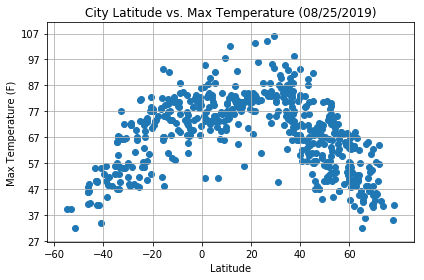

<Figure size 432x288 with 0 Axes>

In [171]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Latitude vs. Temperature Plot

df1 = df[["Max Temp","Lat"]]
plt.xticks(np.arange(-80,80,20))
plt.yticks(np.arange(df1["Max Temp"].min()-5,df1["Max Temp"].max()+5, 10))
plt.scatter(df1["Lat"], df1["Max Temp"])
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({max_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()
#Save the plotted figures as .pngs.
plt.savefig("output_data/TempPlot.png")

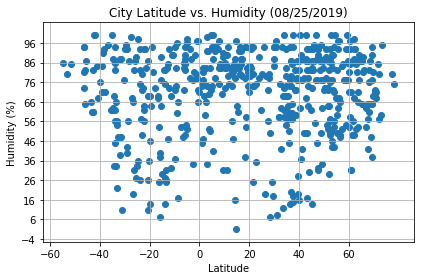

<Figure size 432x288 with 0 Axes>

In [172]:
#Latitude vs. Humidity Plot
df2 = df[["Humidity","Lat"]]
plt.xticks(np.arange(-80,80,20))
plt.yticks(np.arange(df2["Humidity"].min()-5,df2["Humidity"].max()+5, 10))
plt.scatter(df2["Lat"], df2["Humidity"])
plt.grid()
plt.title(f"City Latitude vs. Humidity ({max_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()
#Save the plotted figures as .pngs.
plt.savefig("output_data/HumidityPlot.png")

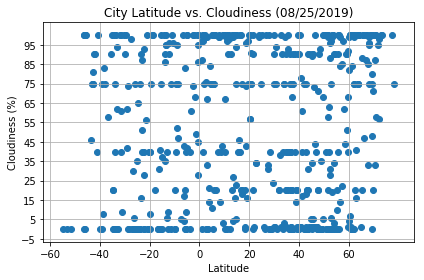

<Figure size 432x288 with 0 Axes>

In [173]:
#Latitude vs. Cloudiness Plot
df3 = df[["Cloudiness","Lat"]]
plt.xticks(np.arange(-80,80,20))
plt.yticks(np.arange(df3["Cloudiness"].min()-5,df3["Cloudiness"].max()+5, 10))
plt.scatter(df3["Lat"], df3["Cloudiness"])
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({max_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.show()
#Save the plotted figures as .pngs.
plt.savefig("output_data/CloudinessPlot.png")

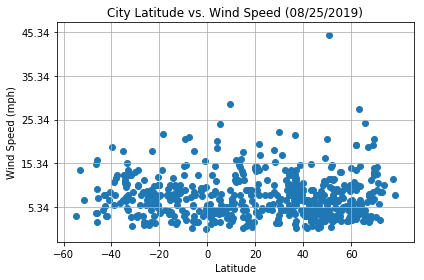

<Figure size 432x288 with 0 Axes>

In [174]:
#Latitude vs. Wind Speed Plot
df4 = df[["Wind Speed","Lat"]]
plt.xticks(np.arange(-80,80,20))
plt.yticks(np.arange(df4["Wind Speed"].min()-5,df4["Wind Speed"].max()+5, 10))
plt.scatter(df4["Lat"], df4["Wind Speed"])
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({max_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()
#Save the plotted figures as .pngs.
plt.savefig("output_data/WindSpeedPlot.png")